# CHESS WIN PREDICTOR



The project aims to develop a model that estimates the probability of winning a chess game against an opponent by considering the player's rating, opening strategy, and chosen time control.

---



**STEPS TO PERFORM :**

1. Data Wrangling
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Selection
5. Model Testing
6. Model evaluation

# DATA WRANGLING

STEP 1 : DATA GATHERING

Data Set : [Lichess Data](https://www.kaggle.com/datasets/datasnaek/chess)

STEP 2 : ASSESSING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('games.csv')

In [2]:
print(df.shape,'\n')
print(df.info())

(20058, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+

1. NUMERICAL COLUMNS : turns, white_rating, black_rating, opening_ply
2. CATEGORICAL COLUMNS : rated, victory_status, winner, opening_name
3. MIXED COLUMNS : id, increment_code, moves

In [3]:
df.head(n=5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# EXPLORATORY DATA ANALYSIS

1. UNIVARIATE ANALYSIS ON TURNS
2. UNIVARIATE ANALYSIS ON WHITE & BLACK RATINGS
3. UNIVARIATE ANALYSIS ON WINNER
4. UNIVARIATE ANALYSIS ON OPENING NAME
5. BIVARIATE ANALYSIS ON WINNER & OPENING NAME
6. BIVARIATE ANALYSIS ON RATING & OPENING NAME

# EDA - 1


PERFORMING UNIVARIATE ANALYSIS ON COLUMN TURNS

---



In [4]:
df['turns'].describe() # OVERVIEW OF DATA

,turns
count,20058.000000
mean,60.465999
std,33.570585
min,1.000000
25%,37.000000
50%,55.000000
75%,79.000000
max,349.000000


In [5]:
df['turns'].isnull().any() # CHECKING FOR NULL VALUES

False

<Axes: >

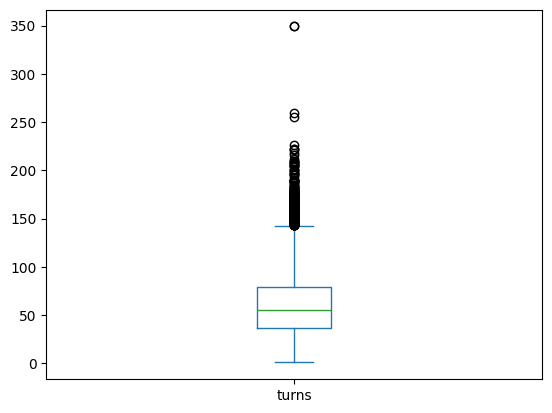

In [6]:
df['turns'].plot(kind='box') # ANALYSING FOR OUTLIERS

SKEWNESS :  0.8972837714383509


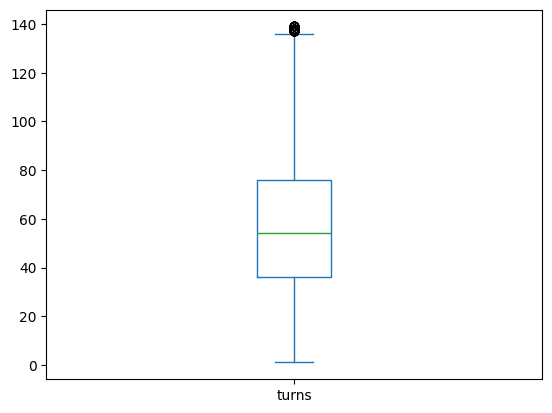

In [7]:
# ANALYSING DATA BY LIMITING TURNS TO 140

df[df['turns']<140]['turns'].plot(kind='box')
print("SKEWNESS : ",df['turns'].skew()) # CHECKING SKEWNESS

SKEWNESS :  0.4285179298544252


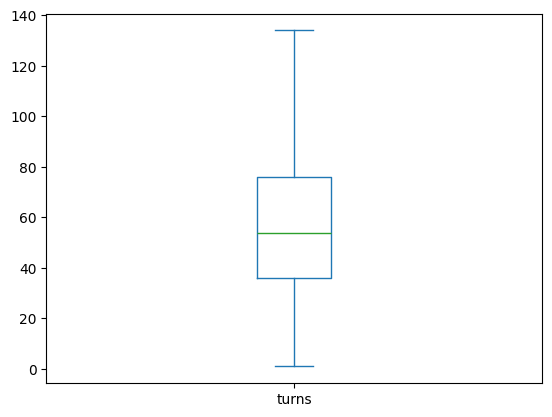

In [8]:
# ANALYSING DATA BY LIMITING TURNS TO 135

df[df['turns']<135]['turns'].plot(kind='box')
print("SKEWNESS : ",df[df['turns']<135]['turns'].skew()) # CHECKING SKEWNESS

<Axes: ylabel='Frequency'>

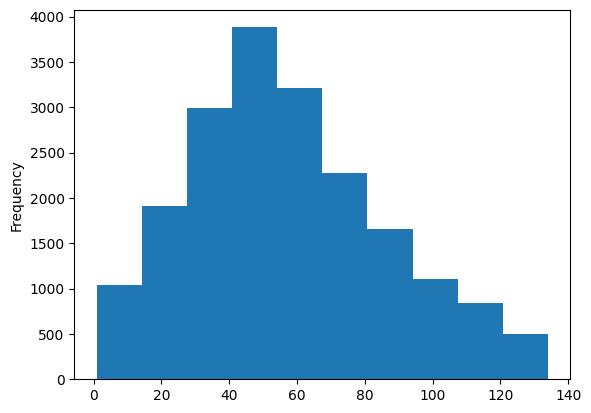

In [9]:
df[df['turns']<135]['turns'].plot(kind='hist')

<Axes: ylabel='Density'>

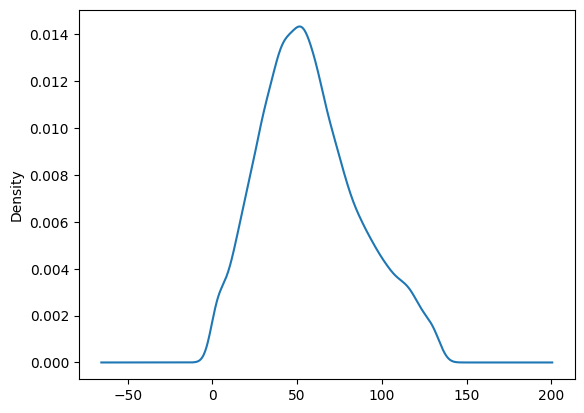

In [10]:
df[df['turns']<135]['turns'].plot(kind='kde') # EVALUATING THE NATURE OF THE CURVE

**CONCLUSION**

---


1. The skewness of the curve improved from 0.897 to 0.428 (tending to normal distribution) after limiting the number of turns to 135.
2. The box plot shows the presence of outliers after number of turns crosses 135 mark.

**ACTION**

---

1. Update the dataframe and remove the records which crosses the mark of 135 turns.

In [11]:
df = df[df['turns']<=135]
print(df.shape) # RECORDS DROPPED = 603

(19455, 16)


# EDA - 2

PERFORMING UNIVARIATE ANALYSIS ON BLACK & WHITE RATINGS

---




In [12]:
df[['black_rating','white_rating']].describe()

,black_rating,white_rating
count,19455.000000,19455.000000
mean,1585.385042,1593.644205
std,290.907297,290.979168
min,789.000000,784.000000
25%,1388.000000,1394.000000
50%,1558.000000,1564.000000
75%,1778.000000,1788.000000
max,2723.000000,2700.000000


In [13]:
print("IS NULL VALUE PRESENT IN BLACK RATING :",df['black_rating'].isnull().any())
print("IS NULL VALUE PRESENT IN WHITE RATING :",df['white_rating'].isnull().any())

IS NULL VALUE PRESENT IN BLACK RATING : False
IS NULL VALUE PRESENT IN WHITE RATING : False


SKEWNESS :  0.2663822764493027


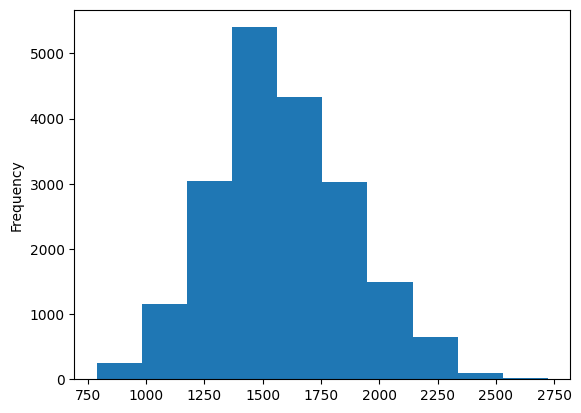

In [14]:
df['black_rating'].plot(kind='hist')
print("SKEWNESS : ",df['black_rating'].skew())

SKEWNESS :  0.2663822764493027


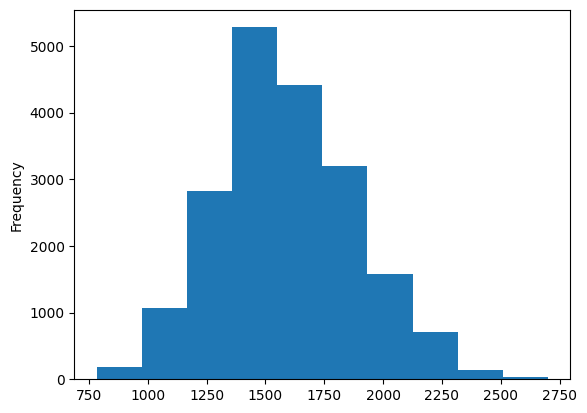

In [15]:
df['white_rating'].plot(kind='hist')
print("SKEWNESS : ",df['black_rating'].skew())

**CONCLUSION**

---
1. The histograms of ratings of players with black or white pieces are almost identical.
2. The data is densed towards mean value.

**ACTIONS**

---

1. No  actions needs to be taken.


# EDA - 3

PERFORMING UNIVARIATE ANALYSIS ON WINNER

---

In [16]:
df['winner'].isnull().any()

False

In [17]:
df['winner'].value_counts()

,count
winner,
white,9772
black,8856
draw,827


<Axes: ylabel='count'>

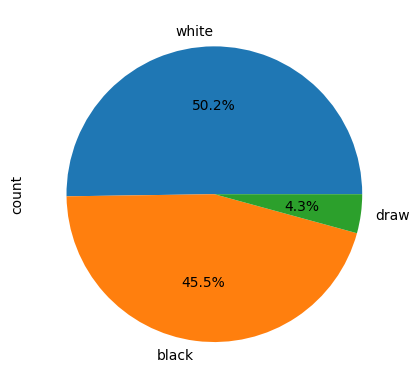

In [18]:
df['winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [19]:
df['victory_status'].value_counts()

,count
victory_status,
resign,11003
mate,6070
outoftime,1576
draw,806


**INFERENCE**

---

1. The total number of games that resulted in a draw are more in column winner than in column victory status.
2. The value in column victory status of extra records are either missing or null.

In [20]:
temp = df[df['winner'] == 'draw']
temp[temp['victory_status'] != 'draw'][['winner','victory_status','increment_code','rated']].sort_values(by='rated')

,winner,victory_status,increment_code,rated
1152,draw,outoftime,8+0,False
14606,draw,outoftime,8+0,False
6921,draw,outoftime,10+0,False
9130,draw,outoftime,25+0,False
376,draw,outoftime,10+0,True
18315,draw,outoftime,10+0,True
16845,draw,outoftime,10+0,True
16253,draw,outoftime,10+1,True
14335,draw,outoftime,10+0,True
11062,draw,outoftime,10+0,True


**INFERENCE**

---
1. The indifference in values might have arised because the games could have been a part of tournament which got over and the active games resulted in a draw.
2. This inference cannot be proved as we do not have enough data.


**CONCLUSION**

---
1. The player with white pieces won 50.2% of the total games played.
2. The player with black pieces won 45.5% of the total games played.

**ACTIONS**

---

1. No  actions needs to be taken.


# EDA - 4

PERFORMING UNIVARIATE ANALYSIS ON OPENING MOVE

---

In [21]:
df['opening_name'].isnull().any()

False

In [22]:
df['opening_name'].value_counts()

,count
opening_name,
Van't Kruijs Opening,353
Sicilian Defense,347
Sicilian Defense: Bowdler Attack,279
French Defense: Knight Variation,265
Scotch Game,263
...,...
Scandinavian Defense: 2.b3,1
Sicilian Defense: Kupreichik Variation,1
Zukertort Opening,1


**INFERENCE**

---

1. Each main line opening has many variations.
2. There are many openings which have been played only one time.

**ACTION**

---
1. Update the dataframe to collectively show the mainline openings.
2. Remove the least frequent openings.


In [23]:
for index, row in df.iterrows():
  val = row['opening_name'].split(':')

  if len(val) == 1:
    df.loc[index,'opening_name'] = row['opening_name'].split('|')[0]
  else:
    df.loc[index,'opening_name'] = val[0]


temp = df['opening_name'].value_counts().reset_index()

temp = temp.sort_values(by='count',ascending=False)

temp

,opening_name,count
0,Sicilian Defense,2477
1,French Defense,1271
2,Queen's Pawn Game,1033
3,Italian Game,950
4,King's Pawn Game,890
...,...,...
175,Valencia Opening,1
176,Alekhine Defense #3,1
177,Petrov's Defense #5,1
178,Global Opening,1


In [24]:
mostFrequentOpenings = set() # CONTAINS THE SET OF TOP 20 MOST FREQUENT OPENINGS

for index, row in temp.iterrows():
  mostFrequentOpenings.add(row['opening_name'])
  if index == 19:
    break

mostFrequentOpenings

{"Bishop's Opening",
 'Caro-Kann Defense',
 'English Opening',
 'Four Knights Game',
 'French Defense',
 'Indian Game',
 'Italian Game',
 "King's Pawn Game",
 'Philidor Defense',
 "Queen's Gambit Accepted",
 "Queen's Gambit Declined",
 "Queen's Gambit Refused",
 "Queen's Pawn Game",
 'Russian Game',
 'Ruy Lopez',
 'Scandinavian Defense',
 'Scotch Game',
 'Sicilian Defense',
 "Van't Kruijs Opening",
 'Zukertort Opening'}

In [25]:
for index, row in df.iterrows():
  if row['opening_name'] not in mostFrequentOpenings:
    df.loc[index,'opening_name'] = 'Other'

df['opening_name'].value_counts()

,count
opening_name,
Other,6536
Sicilian Defense,2477
French Defense,1271
Queen's Pawn Game,1033
Italian Game,950
King's Pawn Game,890
Ruy Lopez,822
Scandinavian Defense,705
English Opening,700


**CONCLUSION**

---
1. The total number of openings after modification changed from 180 to 21.

# EDA - 5

PERFORMING BIVARIATE ANALYSIS ON WINNER & OPENING NAME

---



In [26]:
pd.crosstab(df['opening_name'],df['winner'])

winner,black,draw,white
opening_name,,,
Bishop's Opening,119,14,184
Caro-Kann Defense,256,28,290
English Opening,288,27,385
Four Knights Game,156,13,190
French Defense,586,57,628
Indian Game,168,17,120
Italian Game,442,38,470
King's Pawn Game,432,31,427
Other,2932,283,3321


**CONCLUSION**

---
1. The choice of opening strategy affects the winning probability.


# EDA - 6


PERFORMING BIVARIATE ANALYSIS ON RATINGS & OPENING NAME

---



In [27]:
df1 = df.copy()

for index, row in df1.iterrows():
  rating = row['white_rating']

  if rating <= 800:
    df1.loc[index,'white_rating'] = '0-800'

  elif rating > 800 and rating <=1000 :
    df1.loc[index,'white_rating'] = '800-1000'

  elif rating > 1000 and rating <=1200 :
    df1.loc[index,'white_rating'] = '1000-1200'

  elif rating > 1200 and rating <=1400 :
    df1.loc[index,'white_rating'] = '1200-1400'

  elif rating > 1400 and rating <=1600 :
    df1.loc[index,'white_rating'] = '1400-1600'

  elif rating > 1600 and rating <=1800 :
    df1.loc[index,'white_rating'] = '1600-1800'

  elif rating > 1800 and rating <=2000 :
    df1.loc[index,'white_rating'] = '1800-2000'

  elif rating > 2200 and rating <=2400 :
    df1.loc[index,'white_rating'] = '2200-2400'

  elif rating > 2400 and rating <=2600 :
    df1.loc[index,'white_rating'] = '2400-2600'

  else:
    df1.loc[index,'white_rating'] = '2600+'


pd.crosstab(df1['opening_name'],df1['white_rating'])

<ipython-input-27-edf6dae4a16b>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1400-1600' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[index,'white_rating'] = '1400-1600'


white_rating,0-800,1000-1200,1200-1400,1400-1600,1600-1800,1800-2000,2200-2400,2400-2600,2600+,800-1000
opening_name,,,,,,,,,,
Bishop's Opening,0,29,52,124,78,24,2,0,6,2
Caro-Kann Defense,0,18,87,155,133,102,14,6,57,2
English Opening,0,35,98,247,130,94,19,5,66,6
Four Knights Game,0,37,100,98,71,24,4,1,16,8
French Defense,0,62,192,337,337,226,27,5,73,12
Indian Game,0,11,27,79,88,62,12,1,21,4
Italian Game,0,32,177,302,256,109,20,2,47,5
King's Pawn Game,1,138,279,294,105,34,4,0,5,30
Other,3,494,1149,1856,1343,1022,144,32,396,97


# FEATURE ENGINEERING & ENCODING CATEGORICAL COLUMNS

PERFORMING ONE-HOT-ENCODING ON OPENING NAME, WINNER & INCREMENT CODE AND BINARY ENCODING ON COLOR OF PIECES

---



In [28]:
df_white = df.copy()
df_black = df.copy()

df_white.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

ENCODING FOR WHITE

---



In [29]:
# DROPPING NON ESSENTIAL COLUMNS
df_white.drop(['id','rated','created_at','last_move_at','turns','victory_status','white_id','black_id','moves','opening_eco','opening_ply'],axis=1,inplace=True)

# CATEGORIZING INCREMENT CODE AS BLITZ, RAPID & CLASSICAL
def categorize(time_control):
  value = time_control.split('+')[0]
  if int(value) < 10:
    return 'BLITZ'
  elif int(value) > 10 and int(value) < 20:
    return 'RAPID'
  else:
    return 'CLASSICAL'

df_white['increment_code'] = df_white['increment_code'].apply(categorize)

# SETTING SELECTED COLOR OF PIECES - 1 FOR WHITE, 0 FOR BLACK
df_white['selected_color'] = 1

# CALCULATING RATING DIFFERENCE
df_white['rating_diff'] = df_white['white_rating'] - df_white['black_rating']

# CATEGORIZING WINNER - 1 FOR WHITE, 0 FOR BLACK
df_white['winner'] = df_white['winner'].apply(lambda x: 1 if x == 'white' else 0)

df_white.head(n=10)

,winner,increment_code,white_rating,black_rating,opening_name,selected_color,rating_diff
0,1,RAPID,1500,1191,Other,1,309
1,0,BLITZ,1322,1261,Other,1,61
2,1,BLITZ,1496,1500,King's Pawn Game,1,-4
3,1,CLASSICAL,1439,1454,Queen's Pawn Game,1,-15
4,1,CLASSICAL,1523,1469,Philidor Defense,1,54
5,0,CLASSICAL,1250,1002,Sicilian Defense,1,248
6,1,CLASSICAL,1520,1423,Other,1,97
7,0,RAPID,1413,2108,Other,1,-695
8,0,RAPID,1439,1392,Italian Game,1,47
9,1,CLASSICAL,1381,1209,Scandinavian Defense,1,172


In [30]:
# ENCODING WINNER, INCREMENT CODE & OPENING NAME

from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder()

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df_white[['increment_code','opening_name']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['increment_code','opening_name']))

# Concatenate with original DataFrame if needed
df_white_final = pd.concat([df_white, encoded_df], axis=1).drop(['increment_code','opening_name'], axis=1)

df_white_final.head(n=10)

,winner,white_rating,black_rating,selected_color,rating_diff,increment_code_BLITZ,increment_code_CLASSICAL,increment_code_RAPID,opening_name_Bishop's Opening,opening_name_Caro-Kann Defense,...,opening_name_Queen's Gambit Declined,opening_name_Queen's Gambit Refused,opening_name_Queen's Pawn Game,opening_name_Russian Game,opening_name_Ruy Lopez,opening_name_Scandinavian Defense,opening_name_Scotch Game,opening_name_Sicilian Defense,opening_name_Van't Kruijs Opening,opening_name_Zukertort Opening
0,1.0,1500.0,1191.0,1.0,309.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1322.0,1261.0,1.0,61.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1496.0,1500.0,1.0,-4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1439.0,1454.0,1.0,-15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1523.0,1469.0,1.0,54.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1250.0,1002.0,1.0,248.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1520.0,1423.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1413.0,2108.0,1.0,-695.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1439.0,1392.0,1.0,47.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1381.0,1209.0,1.0,172.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


REMOVING NAN VALUES

---



In [31]:
df_white_final = df_white_final.dropna()

ENCODING FOR BLACK

---



In [32]:
df_black.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [33]:
# DROPPING NON ESSENTIAL COLUMNS
df_black.drop(['id','rated','created_at','last_move_at','turns','victory_status','white_id','black_id','moves','opening_eco','opening_ply'],axis=1,inplace=True)

# CATEGORIZING INCREMENT CODE AS BLITZ, RAPID & CLASSICAL
def categorize(time_control):
  value = time_control.split('+')[0]
  if int(value) < 10:
    return 'BLITZ'
  elif int(value) > 10 and int(value) < 20:
    return 'RAPID'
  else:
    return 'CLASSICAL'

df_black['increment_code'] = df_black['increment_code'].apply(categorize)

# CALCULATING RATING DIFFERENCE
df_black['rating_diff'] = df_black['black_rating'] - df_black['white_rating']

# CATEGORIZING WINNER - 1 FOR WHITE, 0 FOR BLACK
df_black['winner'] = df_black['winner'].apply(lambda x: 1 if x == 'white' else 0)

# SETTING SELECTED COLOR OF PIECES - 1 FOR WHITE, 0 FOR BLACK
df_black['selected_color'] = 0


df_black.head(n=10)

,winner,increment_code,white_rating,black_rating,opening_name,rating_diff,selected_color
0,1,RAPID,1500,1191,Other,-309,0
1,0,BLITZ,1322,1261,Other,-61,0
2,1,BLITZ,1496,1500,King's Pawn Game,4,0
3,1,CLASSICAL,1439,1454,Queen's Pawn Game,15,0
4,1,CLASSICAL,1523,1469,Philidor Defense,-54,0
5,0,CLASSICAL,1250,1002,Sicilian Defense,-248,0
6,1,CLASSICAL,1520,1423,Other,-97,0
7,0,RAPID,1413,2108,Other,695,0
8,0,RAPID,1439,1392,Italian Game,-47,0
9,1,CLASSICAL,1381,1209,Scandinavian Defense,-172,0


In [34]:
# ENCODING WINNER, INCREMENT CODE & OPENING NAME

from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder()

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df_black[['increment_code','opening_name']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['increment_code','opening_name']))

# Concatenate with original DataFrame if needed
df_black_final = pd.concat([df_black, encoded_df], axis=1).drop(['increment_code','opening_name'], axis=1)

df_black_final.head(n=10)

,winner,white_rating,black_rating,rating_diff,selected_color,increment_code_BLITZ,increment_code_CLASSICAL,increment_code_RAPID,opening_name_Bishop's Opening,opening_name_Caro-Kann Defense,...,opening_name_Queen's Gambit Declined,opening_name_Queen's Gambit Refused,opening_name_Queen's Pawn Game,opening_name_Russian Game,opening_name_Ruy Lopez,opening_name_Scandinavian Defense,opening_name_Scotch Game,opening_name_Sicilian Defense,opening_name_Van't Kruijs Opening,opening_name_Zukertort Opening
0,1.0,1500.0,1191.0,-309.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1322.0,1261.0,-61.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1496.0,1500.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1439.0,1454.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1523.0,1469.0,-54.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1250.0,1002.0,-248.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1520.0,1423.0,-97.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1413.0,2108.0,695.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1439.0,1392.0,-47.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1381.0,1209.0,-172.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


REMOVING NAN VALUES

---



In [35]:
df_black_final = df_black_final.dropna()

# SPLITTING DATASET : TRAINING SET & TESTING SET

SPLITTING DATASET FOR WHITE

---



In [36]:
from re import X
from sklearn.model_selection import train_test_split

input_columns = list(df_white_final.columns)
input_columns.remove('winner')

X_white = df_white_final[input_columns]
y_white = df_white_final['winner']  # Assuming 1 for white wins and 0 for black wins

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

SPLITTING DATASET FOR BLACK

---



In [37]:
from sklearn.model_selection import train_test_split

input_columns = list(df_black_final.columns)
input_columns.remove('winner')

X_black = df_black_final[input_columns]
y_black = df_black_final['winner']  # Assuming 1 for white wins and 0 for black wins

X_train_black, X_test_black, y_train_black, y_test_black = train_test_split(X_black, y_black, test_size=0.2, random_state=42)

# FIT THE MODEL

FIT THE MODEL FOR DATSET FOR WHITE

---



In [38]:
from sklearn.linear_model import LinearRegression

model_white = LinearRegression()
model_white.fit(X_train_white, y_train_white)

LinearRegression()

FIT THE MODEL FOR DATSET FOR BLACK

---



In [39]:
from sklearn.linear_model import LinearRegression

model_black = LinearRegression()
model_black.fit(X_train_black, y_train_black)

LinearRegression()

# PREDICT WIN PROBABILITY

In [53]:
def WinPredictor(inputValues):
    if inputValues['selected_color'].values[0] == 1.0:
         return model_white.predict(inputValues)[0]*100

    return model_black.predict(inputValues)[0]*100

In [54]:
WinPredictor(X_test_white.head(n=1))

45.3807288498071